In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [2]:
# This is a student dataset consisting 2 attributes cgpa and iq, in this notebook we would try to cluster this students based on these 2 attr
df = pd.read_csv('/content/student_clustering.csv')
print("The shape of data is",df.shape)
df.head()


The shape of data is (200, 2)


,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110


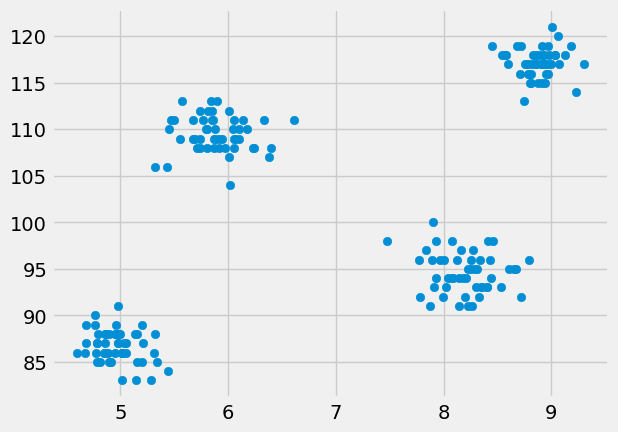

In [3]:
plt.scatter(df['cgpa'],df['iq'])

In [4]:
from sklearn.cluster import KMeans

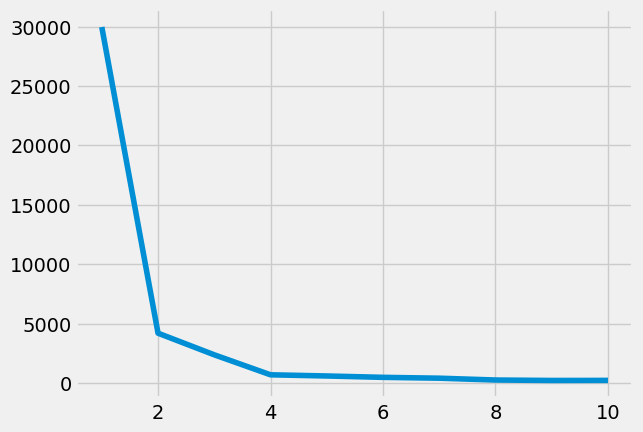

In [5]:
# Within cluster Sum of Squared errors
# the less the wcss , its better
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(df)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)


In [6]:
# the elbow bend is at 4,
# so we chose K = 4

In [7]:
X = df.iloc[:,:].values
km = KMeans(n_clusters=4)
labels = km.fit_predict(X)


In [8]:
labels

array([1, 0, 3, 3, 0, 0, 3, 2, 0, 3, 1, 0, 3, 1, 0, 3, 0, 3, 0, 0, 3, 1,
       3, 1, 1, 3, 1, 2, 3, 0, 2, 0, 2, 0, 3, 3, 2, 0, 1, 0, 1, 3, 3, 1,
       2, 2, 3, 0, 2, 0, 1, 1, 2, 3, 2, 0, 0, 2, 0, 2, 0, 3, 3, 2, 1, 2,
       3, 1, 0, 3, 0, 2, 3, 1, 0, 2, 0, 2, 1, 3, 3, 2, 0, 1, 2, 1, 2, 0,
       2, 0, 2, 2, 3, 1, 3, 3, 2, 3, 1, 2, 0, 1, 1, 2, 1, 1, 3, 1, 2, 2,
       3, 2, 0, 0, 3, 2, 3, 0, 2, 1, 1, 0, 3, 2, 3, 1, 3, 0, 1, 3, 3, 0,
       1, 1, 0, 2, 0, 1, 3, 3, 3, 1, 0, 1, 1, 2, 1, 2, 0, 1, 2, 1, 2, 2,
       1, 3, 0, 2, 0, 3, 1, 2, 0, 3, 2, 1, 0, 1, 1, 2, 2, 0, 2, 1, 1, 3,
       2, 0, 1, 2, 2, 0, 0, 0, 3, 1, 3, 3, 2, 0, 3, 3, 1, 1, 3, 1, 2, 0,
       0, 2], dtype=int32)

In [9]:
X[labels == 3,1]

array([ 93.,  97.,  98.,  94.,  97.,  95.,  91.,  98.,  92.,  98.,  94.,
        96.,  96.,  96.,  93.,  94.,  96.,  96.,  95.,  93.,  95.,  94.,
        92.,  91.,  92.,  95.,  94.,  95.,  92.,  94.,  91.,  95.,  93.,
        97.,  98.,  96.,  93., 100.,  96.,  94.,  95.,  93.,  92.,  98.,
        96.,  93.,  91.,  93.,  94.,  96.])

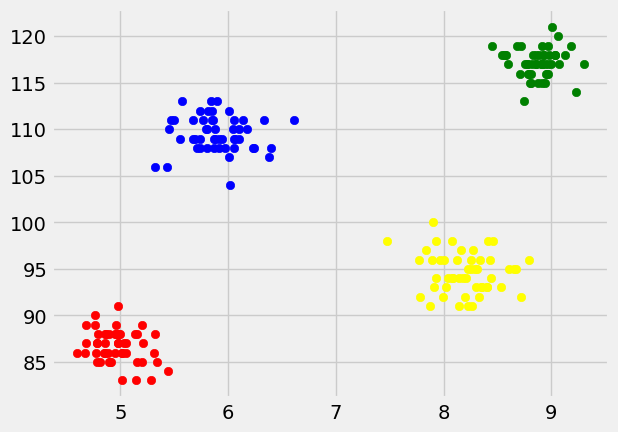

In [10]:
plt.scatter(X[labels == 0,0],X[labels == 0,1],color='blue')
plt.scatter(X[labels == 1,0],X[labels == 1,1],color='red')
plt.scatter(X[labels == 2,0],X[labels == 2,1],color='green')
plt.scatter(X[labels == 3,0],X[labels == 3,1],color='yellow')

## Interpreation from the CLuster profiles

So basically we are getting 4 clusters , each groups are being segregated by 4 different colors

- Green = High IQ, High CGPA( both Intelligent and Hard working)
- Yellow = Mid IQ, High CGPA(Hard working)
- Blue = High IQ but low CGPA( Intelligent but lack discipline)
- Red = Low IQ, Low CGPA( Not intelligent, negligent towards study)